[0, 1]


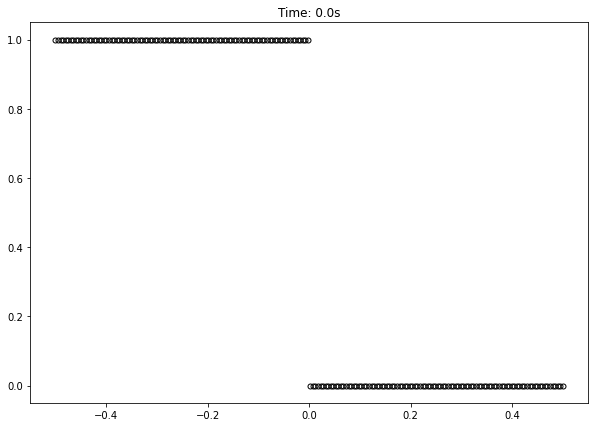

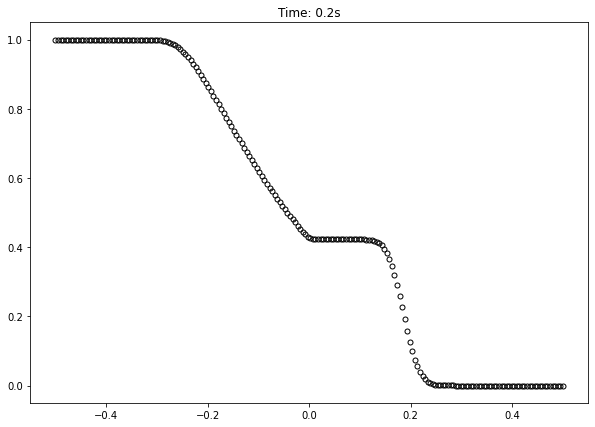

In [32]:
import matplotlib.pyplot as plt
import os
import h5py
import numpy as np

os.environ['HDF5_USE_FILE_LOCKING'] = 'TRUE'

def GetSize(path):
    file = h5py.File(path, mode='r')
    n = file["times"].shape[0]
    file.close()
    return n

def Load(path, chunk=[]):
    # @brief Reads grid data and time data from a specified hdf5 file.
    # @param path The path of the HDF5 file
    # @param dataset A string name of the main dataset containing the states data
    # @param times A string name of the time dataset containing all time points
    # @param chunk An optional [start, end] list that specifies how many time steps to load
    file = h5py.File(path, "r")
    if chunk:
        data_array = np.array(file['data'][chunk[0]:chunk[1],:,:])
        time_array = np.array(file['times'][chunk[0]:chunk[1]])
    else:
        data_array = np.array(file['data'][:, 0, :, :])
        time_array = np.array(file['times'])
    file.close()
    return data_array #, time_array)

path = '/home/maikel/Development/FiniteVolumeSolver/build_2D-Debug/HLLEM.h5'

file = h5py.File(path, mode='r')
data = np.array(file['data'])
times = np.array(file['times'])
dx = file['data'].attrs['cell_size']
xlower = file['data'].attrs['xlower']
file.close()

nx = [data.shape[2], data.shape[3]]
xupper = xlower + dx * nx

vmin = None #0.4
vmax = None #2.0

ns = [i for i in range(data.shape[0])]
print(ns)

marker_style = dict(color='black',  fillstyle='none', linestyle='none', marker='o',
                    markersize=5, markerfacecoloralt='tab:red')

for n in ns:
    rho = data[n, 0, :, 0]
    rhou = data[n, 1, :, 0]
    u = rhou / rho
    p = data[n, 4, :, 0]
    rhoY = data[n, 3, :, 0]
    Y = rhoY / rho

    real_x = np.array(np.linspace(xlower[0], xupper[0], nx[0], endpoint=True))
    dxt = [int(nx[0] / (nticks - 1)), int(nx[1] / (nticks - 1))]
    
    f, ax = plt.subplots(figsize=(10, 7))
    im = plt.plot(real_x, u, **marker_style)
    ax.set_title('Time: {:.3}s'.format(times[n]))
    plt.show()